<a href="https://colab.research.google.com/github/Tobias-2/FINALL-REPOSITORIES-FROM-COLAB/blob/main/18_4_Podstawowe_warstwy_sieci_neuronowych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikeras
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf

dense_layer = tf.keras.layers.Dense(32)

# albo bardziej dosłownie

dense_layer = tf.keras.layers.Dense(units=32)

In [ ]:
flatten = tf.keras.layers.Flatten()

In [ ]:
input_data = tf.ones((16, 3, 3))

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers

#stworzenie modelu

# sposób pierwszy

seq_model = tf.keras.Sequential()

# input_shape jest niewymagane, lecz pozwala powiedzieć,
# "chcę mieć taki rozmiar danych wejściowych", co pozwala
# uniknąć głupich pomyłek w stylu: przekazujemy inny rozmiar,
# bo zapomnieliśmy np. zmniejszyć obrazów wejściowych

seq_model.add(layers.Flatten(input_shape=[3, 3]))
seq_model.add(layers.Dense(16, name="input_layer"))
seq_model.add(layers.Dense(32, name="hidden_layer"))
seq_model.add(layers.Dense(4, name="output_layer"))

#sposób drugi

seq_model_2 = tf.keras.Sequential([
    layers.Flatten(),
    layers.Dense(16, name="input_layer"),
    layers.Dense(32, name="hidden_layer"),
    layers.Dense(4, name="output_layer")
])

# uruchomienie naszego modelu z wygenerowanymi danymi
output = seq_model_2(input_data)
print(output)

tf.Tensor(
[[ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]
 [ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]
 [ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]
 [ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]
 [ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]
 [ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]
 [ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]
 [ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]
 [ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]
 [ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]
 [ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]
 [ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]
 [ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]
 [ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]
 [ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]
 [ 0.7445103  -0.9534856  -0.10628086 -0.7101821 ]], shape=(16, 4), dtype=float32)


In [ ]:
import numpy as np
import tensorflow as tf

train, test = tf.keras.datasets.fashion_mnist.load_data()

# wydobycie obrazów oraz labelek
images, labels = train

# normalizacja wartości pikseli (maks. wartość
# wynosi 255.0, czyli aby znormalizować nasze dane,
# musimy podzielić każdy piksel przez maks. wartość)
images = images/255.0

# zapisujemy dane jako int
labels = labels.astype(np.int32)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1)

# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)

In [ ]:
f_mnist_model = tf.keras.Sequential([
    # spłaszczanie obrazka do wektora jednowymiarowego
    layers.Flatten(),

    layers.Dense(300, activation='relu'),
    layers.Dense(150, activation='relu'),

    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    layers.Dense(10, activation='softmax')
])

In [ ]:
tf.keras.Sequential([
    layers.Flatten(input_shape=[24, 24]),
    # Replace ... with actual Keras layers
    layers.Dense(64, activation='relu'), # Example Dense layer
    layers.Dense(10, activation='softmax') # Example output layer
])

<Sequential name=sequential_26, built=True>

In [ ]:
f_mnist_model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_26 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
train_stats = f_mnist_model.fit(train_ds, epochs=10, verbose=1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7794 - loss: 0.6243
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8589 - loss: 0.3830
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8752 - loss: 0.3363
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8835 - loss: 0.3111
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8898 - loss: 0.2936
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8960 - loss: 0.2721
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9021 - loss: 0.2555
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9056 - loss: 0.2499
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9082 - loss: 0.2355
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9125 - loss: 0.2234


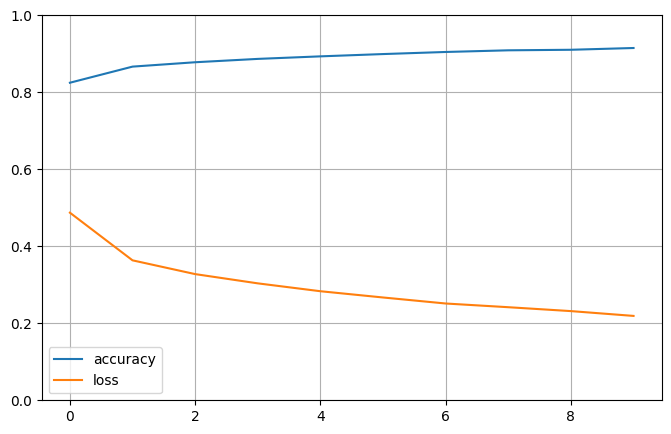

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
y_pred = f_mnist_model.predict(X_test)
print("probs : ", y_pred[2])
print("klasa :", np.argmax(y_pred[2]))
print("rzeczywista klasa: ", y_test[2])

"""
probs :  [4.0548810e-15 1.0000000e+00 9.3477974e-17 5.3090128e-13 7.5702587e-15
 5.9295928e-25 2.1536054e-11 3.4459677e-24 2.8725664e-16 2.4974258e-22]
klasa : 1
rzeczywista klasa:  1
"""

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
probs :  [5.1847375e-05 1.0678017e-05 5.1847201e-06 2.8422539e-05 4.2775678e-06
 6.3365516e-03 4.5532911e-06 8.4697914e-01 6.1932515e-05 1.4651735e-01]
klasa : 7
rzeczywista klasa:  7


'\nprobs :  [4.0548810e-15 1.0000000e+00 9.3477974e-17 5.3090128e-13 7.5702587e-15\n 5.9295928e-25 2.1536054e-11 3.4459677e-24 2.8725664e-16 2.4974258e-22]\nklasa : 1\nrzeczywista klasa:  1\n'

In [ ]:
# stworzenie wejścia

input = tf.keras.Input(shape=X_train.shape[1:])

# możemy wypisać, co ta warstwa przyjmuje - jest to rozmiar
# naszego obrazka bez batch_size (który ma wartość None)
print(input)

# spłaszczenie wejścia
input_flat = layers.Flatten(input_shape=[28,28])(input)

# nasza kolejna warstwa jest typu Dense, jak poprzednio, ale od razu
# i bezpośrednio przekazujemy jej wejście, tak jak funkcji w Pythonie:
hidden_1 =layers.Dense(320, activation='relu', name="hidden_1")(input_flat)
hidden_2 =layers.Dense(150, activation='relu', name="hidden_2")(hidden_1)

# złączamy wyniki z obu warstw za pomocą warstwy typu Concatenate
concat_layer = layers.Concatenate()([input_flat, hidden_2])
output = layers.Dense(10, activation='softmax')(concat_layer)

# tworzymy model, przekazując mu co ma być naszymi wyjściami, a co wejściami
model_res = tf.keras.Model(inputs=[input], outputs=[output])

# podsumowanie naszego modelu
model_res.summary()

<KerasTensor shape=(None, 28, 28), dtype=float32, sparse=False, name=keras_tensor_172>


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_25            │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_28 (Flatten)      │ (None, 784)            │              0 │ input_layer_25[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hidden_1 (Dense)          │ (None, 320)            │        251,200 │ flatten_28[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hidden_2 (Dense)          │ (None, 150)            │         48,150 │ hidden_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 934)            │              0 │ flatten_28[0][0],      │
│                           │                        │                │ hidden_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 10)             │          9,350 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 308,700 (1.18 MB)

 Trainable params: 308,700 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# pamiętajmy, aby nie dodawać pierwszego wymiaru (batch_size)
text = np.array([["ala ma kota"]])

In [ ]:
text = np.array([["ala ma kota"]])

input_1 = tf.keras.Input(shape=text.shape[1:])
input_2 = tf.keras.Input(shape=X_train.shape[1:])

# nasza kolejna warstwa jest typu Dense, jak poprzednio,
# ale od razu przekazujemy jej wejście, tak jak funkcji w Pythonie
hidden_1 =layers.Dense(320, activation='relu')(input_1)
hidden_2 =layers.Dense(150, activation='relu')(hidden_1)

# złączamy wyniki naszych warstw za pomocą warstwy
# typu Concatenate podając jako argumenty input_1 oraz hidden_2
concat_layer = layers.Concatenate()([input_1, hidden_2])
output = layers.Dense(10, activation='softmax')(concat_layer)

# tworzymy model, przekazując mu co ma być naszymi wyjściami, a co wejściami
model = tf.keras.Model(inputs=[input_1, input_2], outputs=[output])

# podsumowanie naszego modelu
model.summary()

Model: "functional_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_26            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 320)            │            640 │ input_layer_26[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 150)            │         48,150 │ dense_13[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 151)            │              0 │ input_layer_26[0][0],  │
│ (Concatenate)             │                        │                │ dense_14[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_27            │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 10)             │          1,520 │ concatenate_1[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 50,310 (196.52 KB)

 Trainable params: 50,310 (196.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# kompilacja
model_res.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#szkolenie na takich samych danych jak poprzednio
train_stats = model_res.fit(train_ds, epochs=10, verbose=1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7823 - loss: 0.6105
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8578 - loss: 0.3815
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8781 - loss: 0.3315
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8836 - loss: 0.3090
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8925 - loss: 0.2863
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8954 - loss: 0.2718
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9013 - loss: 0.2622
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9045 - loss: 0.2493
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9087 - loss: 0.2380
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9134 - loss: 0.2283


#Zadanie: Fashion-Mnist

Pierwszy krok----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)

In [ ]:
# kompilacja
model_res.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#szkolenie na takich samych danych jak poprzednio
train_stats = model_res.fit(train_ds, epochs=20, verbose=1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9378 - loss: 0.1606
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9394 - loss: 0.1601
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9429 - loss: 0.1515
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9444 - loss: 0.1451
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9445 - loss: 0.1451
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9473 - loss: 0.1401
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9484 - loss: 0.1375
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9485 - loss: 0.1372
Epoch 9/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9501 - loss: 0.1283
Epoch 10/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9529 - loss: 0.1270
Epoch 11/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9520 - loss: 0.1266
Epoch 12/20
1688/1

accuracy > 0.94, jest okej

Drugi krok----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------







In [ ]:
!pip install pyyaml h5py

In [ ]:
import os

In [ ]:
checkpoint_path = "training_1/cp.ckpt.weights.h5" # Change the filepath to end with .weights.h5
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


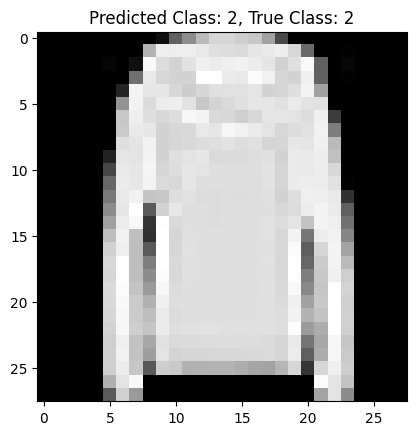

The predicted class for image 0 is 2


In [ ]:
# Function to predict and visualize
def predict_and_visualize(image_index):
  image = X_test[image_index]
  prediction = model.predict(np.expand_dims(image, axis=0))
  predicted_class = np.argmax(prediction)

  plt.imshow(image, cmap='gray')
  plt.title(f"Predicted Class: {predicted_class}, True Class: {y_test[image_index]}")
  plt.show()
  return predicted_class


predicted_class = predict_and_visualize(0)
print(f"The predicted class for image 0 is {predicted_class}")

# Save the Model
model.save('fashion_mnist_model.h5')

2	Pullover - Zgadza się, tak jak na TensorFlow

Trzeci krok----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

datagen.fit(X_train)


train_stats = model_res.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=20, verbose=1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.8135 - loss: 0.4921
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.8252 - loss: 0.4651
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.8218 - loss: 0.4728
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.8225 - loss: 0.4717
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.8275 - loss: 0.4649
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.8275 - loss: 0.4550
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.8302 - loss: 0.4555
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.8315 - loss: 0.4520
Epoch 9/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.8302 - loss: 0.4474
Epoch 10/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.8326 - loss: 0.4485
Epoch 11/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.8326 - loss: 0.4518
Epoch 12

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=0.1,
    zoom_range=0.01,
    width_shift_range=0.01,
    height_shift_range=0.01,
    horizontal_flip=False,
    vertical_flip=False
)



train_stats = model_res.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, verbose=1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.8927 - loss: 0.2900
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.8990 - loss: 0.2674
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9073 - loss: 0.2500
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9094 - loss: 0.2400
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9137 - loss: 0.2298
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9133 - loss: 0.2239
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.9165 - loss: 0.2204
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9220 - loss: 0.2045
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9236 - loss: 0.2041
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9235 - loss: 0.2044


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=0.001,
    zoom_range=0.001,
    width_shift_range=0.001,
    height_shift_range=0.001,
    horizontal_flip=False,
    vertical_flip=False
)



train_stats = model_res.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=15, verbose=1)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9442 - loss: 0.1466
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9468 - loss: 0.1439
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9460 - loss: 0.1410
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9480 - loss: 0.1339
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9501 - loss: 0.1328
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9498 - loss: 0.1318
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9532 - loss: 0.1247
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9530 - loss: 0.1249
Epoch 9/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9526 - loss: 0.1240
Epoch 10/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9578 - loss: 0.1125
Epoch 11/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9568 - loss: 0.1149
Epoch 12

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=0.001,
    zoom_range=0.0001,
    width_shift_range=0.0001,
    height_shift_range=0.0001,
    horizontal_flip=False,
    vertical_flip=False
)



train_stats = model_res.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=20, verbose=1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9684 - loss: 0.0831
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9671 - loss: 0.0868
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9688 - loss: 0.0831
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9689 - loss: 0.0837
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9718 - loss: 0.0774
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9712 - loss: 0.0791
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9727 - loss: 0.0735
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9693 - loss: 0.0820
Epoch 9/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9708 - loss: 0.0763
Epoch 10/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9717 - loss: 0.0749
Epoch 11/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9728 - loss: 0.0748
Epoch 12

pod dobraniu parametrów accuracy to około 0.97